In [14]:
import torch 
import matplotlib.pyplot as plt

def denormalize(tensor, mean, std):
    """
    Undo normalization of a tensor image.
    
    Args:
        tensor (Tensor): Tensor image of shape [3, H, W]
        mean (list): Mean values used in normalization
        std (list): Std values used in normalization
    
    Returns:
        Tensor: Denormalized image
    """
    mean = torch.tensor(mean).view(-1, 1, 1)
    std = torch.tensor(std).view(-1, 1, 1)
    return tensor * std + mean


# NOte std
# SAT standard deviation is calculated so that 68% of students score within one standard deviation of the mean, 95% of students score within two standard deviations of the mean, and 99+% of students score within three standard deviations of the mean.

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
loaded_list = torch.load('images_from_dino.pt', map_location='cpu')
preds = loaded_list['pred_mask']
gt = loaded_list['gt_mask']
jac = loaded_list['jac']
input_x = loaded_list['input']

# CHANGE i
print("i range : ", len(preds[0])-1)

i = 8

print("j batch range : ", len(preds)-1)
j = 6


print(f"0 preds acc : {round(jac[0], 2)}, 1 preds acc : {round(jac[1],2)}")

i range :  63
j batch range :  8
0 preds acc : 0.98, 1 preds acc : 0.77


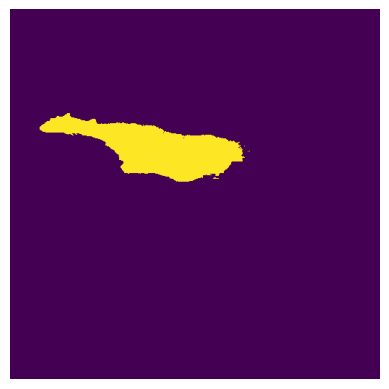

In [15]:
img_np = gt[j][i].permute(1, 2, 0).numpy()

# Display
plt.imshow(img_np)
plt.axis('off')
plt.show()


# 1 single img showed

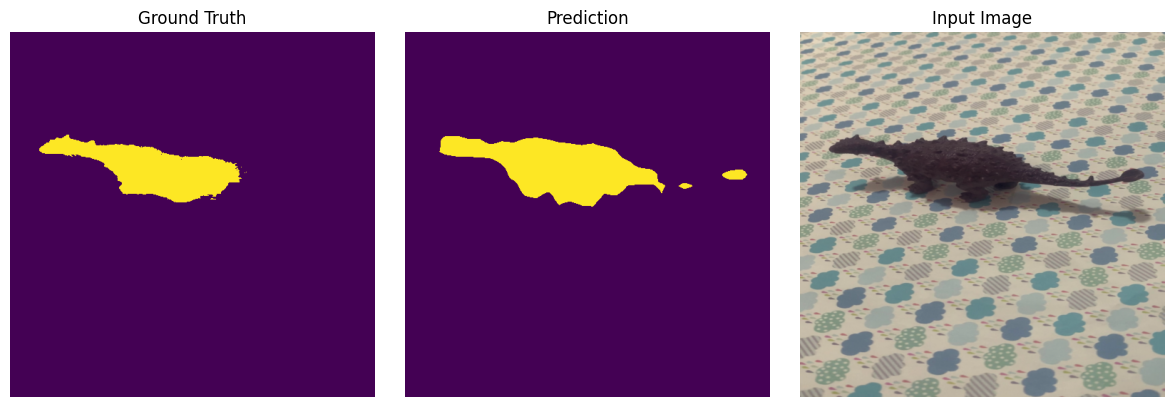

In [16]:

preds_img = preds[j][i].permute(1, 2, 0).numpy()
gt_img = gt[j][i].permute(1, 2, 0).numpy()

denorm_img = denormalize(input_x[j][i], mean, std)
orig_img = denorm_img.clamp(0, 1).permute(1, 2, 0).cpu().numpy()

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Display each image in its subplot
axes[0].imshow(gt_img)
axes[0].set_title("Ground Truth")
axes[0].axis('off')

axes[1].imshow(preds_img)
axes[1].set_title("Prediction")
axes[1].axis('off')

axes[2].imshow(orig_img)
axes[2].set_title("Input Image")
axes[2].axis('off')

plt.tight_layout()
plt.show()


# overlayed images

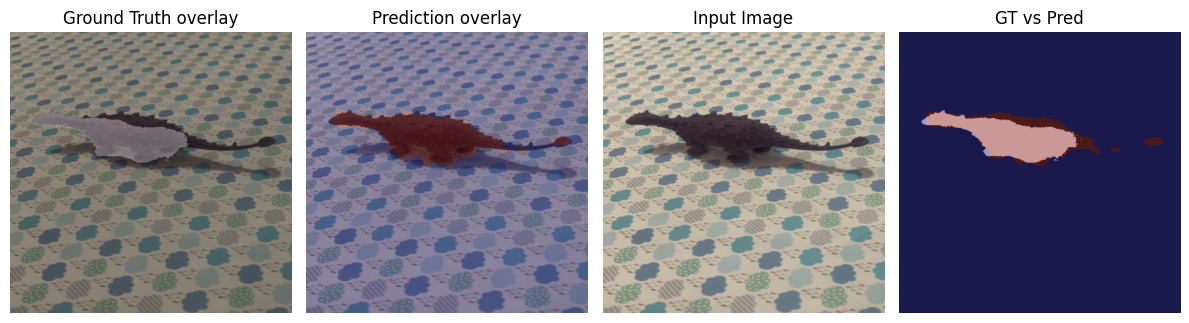

In [17]:
preds_img = preds[j][i].permute(1, 2, 0).numpy()
gt_img = gt[j][i].permute(1, 2, 0).numpy()

denorm_img = denormalize(input_x[j][i], mean, std)
orig_img = denorm_img.clamp(0, 1).permute(1, 2, 0).cpu().numpy()

fig, axes = plt.subplots(1, 4, figsize=(12, 4))

# Display each image in its subplot
axes[0].imshow(gt_img, cmap='gray')
axes[0].imshow(orig_img, alpha=0.7)
axes[0].set_title("Ground Truth overlay")
axes[0].axis('off')

axes[1].imshow(preds_img, cmap='jet')
axes[1].imshow(orig_img, alpha=0.7)
axes[1].set_title("Prediction overlay")
axes[1].axis('off')

axes[2].imshow(orig_img)
axes[2].set_title("Input Image")
axes[2].axis('off')

axes[3].imshow(preds_img, cmap='jet', alpha=0.8)
axes[3].imshow(gt_img, cmap='gray', alpha=0.5)
axes[3].set_title("GT vs Pred")
axes[3].axis('off')

plt.tight_layout()
plt.show()


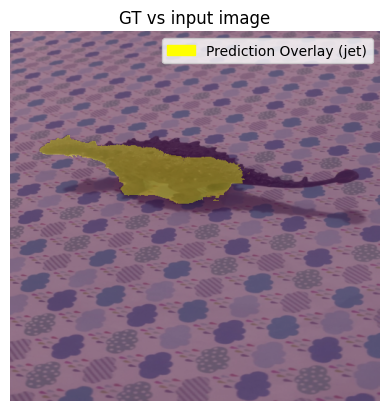

In [18]:
import matplotlib.pyplot as plt
import torch
import matplotlib.patches as mpatches

# Example image tensors [C, H, W]
# i = 2
img1 = gt[j][i]
img2 = preds[j][i]

# Convert to NumPy and permute to [H, W, C]
img1_np = img1.permute(1, 2, 0).numpy()
img2_np = img2.permute(1, 2, 0).numpy()

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

denorm_img = denormalize(input_x[j][i], mean, std)

# Clamp to [0,1] and convert to numpy
img3 = denorm_img.clamp(0, 1).permute(1, 2, 0).cpu().numpy()

# gt_patch = mpatches.Patch(color='gray', label='Ground Truth')
pred_patch = mpatches.Patch(color='yellow', label='Prediction Overlay (jet)')

# Average blend
plt.imshow(img1_np, alpha=1)
# plt.imshow(img2_np,  cmap='jet',  alpha=0.5)  # Half-transparent overlay
plt.imshow(img3, alpha=0.6)
plt.title('GT vs input image')
plt.axis('off')
plt.legend(handles=[pred_patch], loc='upper right')
plt.show()


# plt.imshow(blended)
# plt.axis('off')
# plt.show()


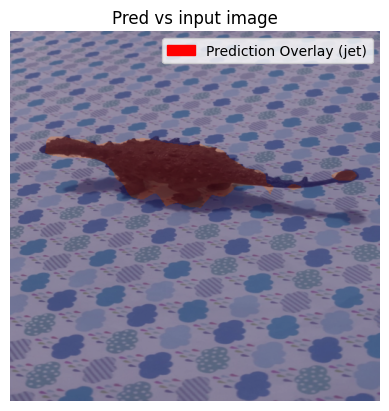

In [19]:
import matplotlib.pyplot as plt
import torch
import matplotlib.patches as mpatches

# Example image tensors [C, H, W]
img1 = gt[j][i]
img2 = preds[j][i]

# Convert to NumPy and permute to [H, W, C]
img1_np = img1.permute(1, 2, 0).numpy()
img2_np = img2.permute(1, 2, 0).numpy()

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

denorm_img = denormalize(input_x[j][i], mean, std)

# Clamp to [0,1] and convert to numpy
img3 = denorm_img.clamp(0, 1).permute(1, 2, 0).cpu().numpy()

# gt_patch = mpatches.Patch(color='gray', label='Ground Truth')
pred_patch = mpatches.Patch(color='red', label='Prediction Overlay (jet)')

# Average blend
# plt.imshow(img1_np, alpha=1)
plt.imshow(img2_np,  cmap='jet',  alpha=1)  # Half-transparent overlay
plt.imshow(img3, alpha=0.7)
plt.title('Pred vs input image')
plt.axis('off')
plt.legend(handles=[pred_patch], loc='upper right')
plt.show()


# plt.imshow(blended)
# plt.axis('off')
# plt.show()


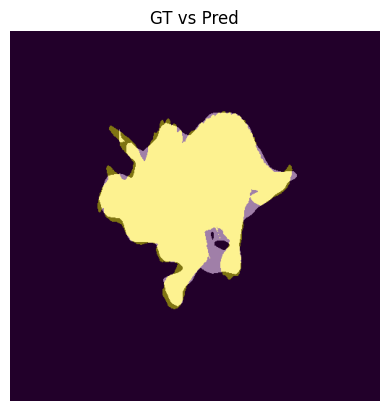

In [20]:
import matplotlib.pyplot as plt
import torch

# Example image tensors [C, H, W]
img1 = gt[0][0]
img2 = preds[0][0]
img3 = torch.rand(3, 128, 128)

# Convert to NumPy and permute to [H, W, C]
img1_np = img1.permute(1, 2, 0).numpy()
img2_np = img2.permute(1, 2, 0).numpy()
img3_np = img3.permute(1, 2, 0).numpy()

# Average blend
plt.imshow(img1_np, alpha=1)
plt.imshow(img2_np,  cmap='gray',  alpha=0.5)  # Half-transparent overlay
# plt.imshow(img_np_norm, alpha=0.7)
plt.title('GT vs Pred')
plt.axis('off')
plt.show()


# plt.imshow(blended)
# plt.axis('off')
# plt.show()


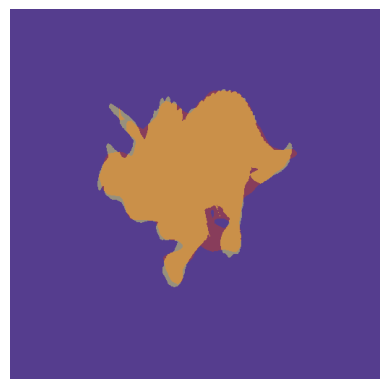

In [21]:
plt.imshow(img1_np*255, alpha= 0.6)
plt.imshow(img2_np*255, cmap='jet', alpha=0.4)  # jet, viridis, etc.
plt.axis("off")
plt.show()


In [22]:
import os

path = '/home/scur0542/open-hummingbird-eval/datasets/split_angles_mvimagenet/70'

print('0 img : ', len(os.listdir(path+'/0/img')))
print('0 mask : ', len(os.listdir(path+'/0/mask')))
print()
print('15 img : ', len(os.listdir(path+'/15/img')))
print('15 mask : ', len(os.listdir(path+'/15/mask')))
print()
print('30 img : ', len(os.listdir(path+'/30/img')))
print('30 mask : ', len(os.listdir(path+'/30/mask')))


print('0 img : ', len(os.listdir(path+'/0/img')))
print('0 mask : ', len(os.listdir(path+'/0/mask')))


print('0 img : ', len(os.listdir(path+'/0/img')))
print('0 mask : ', len(os.listdir(path+'/0/mask')))


print('0 img : ', len(os.listdir(path+'/0/img')))
print('0 mask : ', len(os.listdir(path+'/0/mask')))



0 img :  627
0 mask :  627

15 img :  627
15 mask :  627

30 img :  627
30 mask :  627
0 img :  627
0 mask :  627
0 img :  627
0 mask :  627
0 img :  627
0 mask :  627


In [23]:
'2201453f_011.jpg' in os.listdir(path+'/0/img')

True

In [24]:
'2201453f_011.jpg.png' in os.listdir(path+'/0/img')

False

In [25]:
'011.jpg' in os.listdir('/home/scur0542/open-hummingbird-eval/datasets/mvimgnet/images/70/2201453f/images')


True

In [26]:
'022.jpg.png' in os.listdir('/home/scur0542/open-hummingbird-eval/datasets/mvimgnet/mask/70/2201453f')


True